In [1]:
!pip install tensorflow

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

In [3]:
data_scoring = "score_financial.csv"
data = pd.read_csv(data_scoring)

In [4]:
data

,id,full_name,balance,income,expense,target,age,scoring_financial
0,1,Kelci Hubbert,6969671.1,4436089.5,18734.3,6119836.2,16,83.9
1,2,Kennett Nozzolii,2282719.2,767411.1,4542934.1,5956715.6,21,87.0
2,3,Wheeler Frye,1072879.2,2464512.3,3445669.7,2442224.7,24,96.6
3,4,Marty Skerratt,4938619.6,3304278.8,3277976.2,4320105.3,21,49.7
4,5,Titos Bowskill,6135177.6,7860741.9,6625411.1,7206773.3,22,13.0
...,...,...,...,...,...,...,...,...
995,996,Franciskus Coulthurst,2318608.9,7234108.9,6652364.0,6785132.1,20,8.8
996,997,Merola Burstowe,1330926.9,8810416.2,6906190.2,9030089.6,16,56.1
997,998,Berti Habgood,2465584.7,967816.0,2657621.8,7487412.0,19,16.4
998,999,Anthiathia Plum,510843.9,4851401.7,9659372.6,7915864.9,26,34.8


In [5]:
X = data[["balance", "income", "expense", "target", "age"]]
y = data["scoring_financial"]

# Membagi data menjadi set train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Membangun neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3535.3101 - mae: 52.2573 - val_loss: 3403.6667 - val_mae: 50.8790
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3134.2820 - mae: 48.5918 - val_loss: 3321.7390 - val_mae: 50.0876
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3364.9187 - mae: 50.5780 - val_loss: 3242.9995 - val_mae: 49.3125
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3271.5881 - mae: 49.2434 - val_loss: 3166.9351 - val_mae: 48.5640
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3244.8320 - mae: 49.2374 - val_loss: 3091.6643 - val_mae: 47.8162
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3246.4043 - mae: 49.2342 - val_loss: 3018.7915 - val_mae: 47.0954
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2879.6853 - mae: 45.4247 - val_loss: 2948.5293 - val_mae: 46.3923
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2984.7422 - mae: 46.6696 - val_loss: 2878.1934 - val_mae: 45.6894


In [9]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 733.3705 - mae: 23.4212  
Test Loss: 718.3262329101562, Test MAE: 23.129638671875


In [10]:
import matplotlib.pyplot as plt

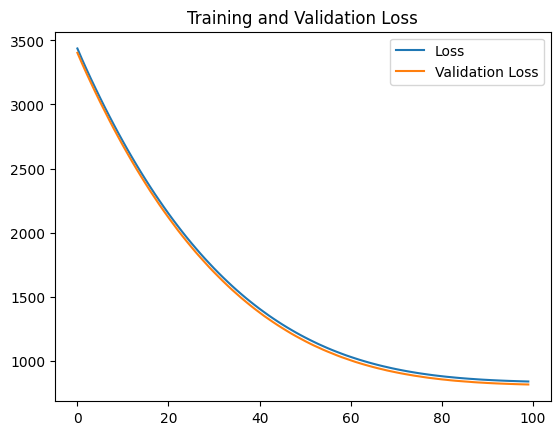

In [11]:
# Plot training history
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),  # 128 Neuron
    Dense(64, activation='sigmoid'),  # 64 Neuron
    Dense(1)  # Output Layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile model dengan learning rate yang berbeda
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)  # Learning rate yang diubah
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


In [15]:
# Train model dengan batch size dan epochs yang diubah
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2814.7678 - mae: 44.9161 - val_loss: 1715.4036 - val_mae: 33.3065
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1929.0162 - mae: 35.8584 - val_loss: 1164.3894 - val_mae: 26.8627
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1402.9661 - mae: 30.9180 - val_loss: 867.6919 - val_mae: 23.8579
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1079.6943 - mae: 27.4121 - val_loss: 748.6375 - val_mae: 23.0818
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 963.9864 - mae: 26.6949 - val_loss: 717.7207 - val_mae: 23.1043
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 835.6768 - mae: 24.7502 - val_loss: 722.4484 - val_mae: 23.3329
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 888.6207 - mae: 26.0317 - val_loss: 730.0309 - val_mae: 23.5008
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 844.8647 - mae: 25.1316 - val_loss: 736.6520 - val_mae: 23.6252
Epoch 9/50
25/25 ━

In [16]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 756.7026 - mae: 23.6449 
Test Loss: 737.6068115234375, Test MAE: 23.485273361206055


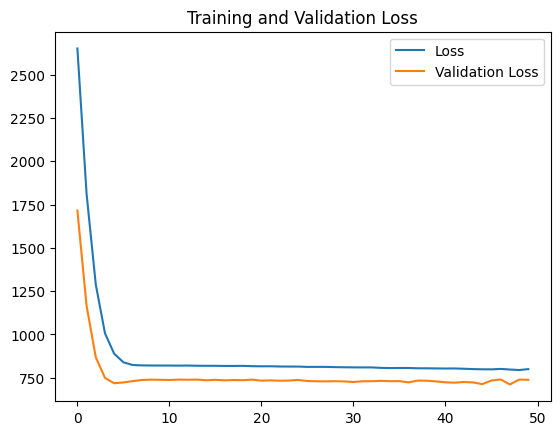

In [17]:

# Plot training history
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [18]:
model.save("my_model_saved.h5")

In [19]:
model.save('my_model.keras')